In [1]:
# Jordan Hendriksen - Data Science for Engineers - Lab 2 - Using real data

#importing needed libraries 
import numpy as np #includes all mathematical tools - includes SVD
import matplotlib.pyplot as plt #allows plotting of nice charts
import matplotlib.colors as color # allows for creating colormaps
import pandas as pd #library for importing and managing datasets
import copy
import scipy.stats as stat # for statistical tests like MWW
import math 

#changes property of matplotlib so will visualize in output
%matplotlib inline

# creating a green to red colormap as is preferred
colors = ["green", "black", "red"]
cmap1 = color.LinearSegmentedColormap.from_list("mycmap", colors)

u1 236.0 p1 0.12205355178432847


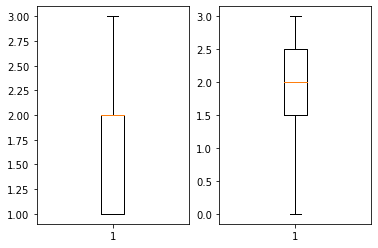

In [2]:
# testing boxplots/MW pvalue testing
b1 = [1,2,1,2,2,2,2,1,1,1,2,1,3,1,3,1,3,2,1,2,1,2,1]
b2 = [1,3,2,3,2,3,2,1,3,2,3,2,3,2,3,2,2,2,1,1,1,1,0,2,2,2,2]

[u1, p1] = stat.mannwhitneyu(b1,b2,alternative = 'two-sided')

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(b1)
ax2.boxplot(b2)

print("u1",u1,"p1",p1)

In [3]:
# Load in compiled cervical cancer data - both scaled and raw gene expression data was given by TCGA - these are just gene
# expression values w/o labels

# scaled data in its original order 
scaledData = pd.read_csv("/Users\Jordan\Documents\GitHub\PythonCode\Data Science for Engineers\BME6900 Cont\scaledData1noSort.csv")
# scaled data sorted by classification of cervical cancer
scaledDataType = pd.read_csv("/Users\Jordan\Documents\GitHub\PythonCode\Data Science for Engineers\BME6900 Cont\scaledData1typeSort.csv")
# scaled data sorted by age at diagnosis
scaledDataAge = pd.read_csv("/Users\Jordan\Documents\GitHub\PythonCode\Data Science for Engineers\BME6900 Cont\scaledDataAgeSort.csv")

# raw data sorted by classification of cervical cancer 
rawDataType = pd.read_csv("/Users\Jordan\Documents\GitHub\PythonCode\Data Science for Engineers\BME6900 Cont\RawDataTypeSort.csv")
# raw data sorted by age at diagnosis
rawDataAge = pd.read_csv("/Users\Jordan\Documents\GitHub\PythonCode\Data Science for Engineers\BME6900 Cont\RawDataAgeSort.csv")

The follow section of code will be used to run the SVD on unsorted data, rank the SVD, and perform the necessary tests form Lab-1 to show that the SVD was computed correctly and maintains its properties:


The dimesions of the input data are: (20530, 309) | This matches the dimensions of U - as it should - (20530, 309) | the length of sigma matches the number of rows - 309 | as do the dimensions of V' - (309, 309)

Sigma of this data set is descending: True  and non-negative: True


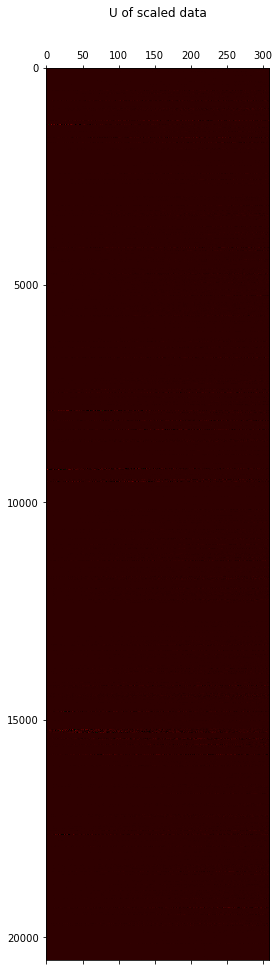

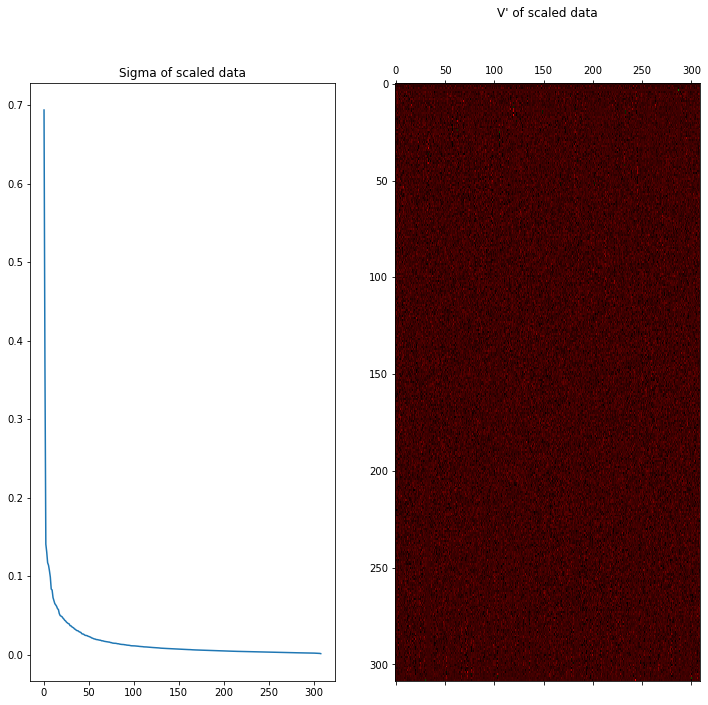

In [4]:
# computing and visualizing the svd of the unsorted scaled data - sd refers to scaled data

Usd,Ssd,VTsd = np.linalg.svd(scaledData,full_matrices = False)

# check dimensions of matrix and rank of sigma - given use of real data no zero S values should exist and rank should 
# match columns in data
Dsize = np.shape(scaledData)
sizeUsd = np.shape(Usd)
sizeSsd = np.shape(Ssd)[0]
sizeVTsd = np.shape(VTsd)
#rank is count of values above zero
thresh = 0.0001
rankSds = np.count_nonzero(Ssd > thresh)

# visualize the output of the SVD
plt.matshow(Usd,cmap = cmap1, aspect = 'auto')
plt.title("U of scaled data")
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(Ssd)
ax1.title.set_text("Sigma of scaled data")
ax2.matshow(VTsd,cmap = cmap1, aspect = 'auto')
ax2.set_title("V' of scaled data",y=1.1)
fig.set_size_inches(12,11)

# print dimensions
print("")
print("The dimesions of the input data are:",Dsize,"| This matches the dimensions of U - as it should -",sizeUsd,
     "| the length of sigma matches the number of rows -",sizeSsd,"| as do the dimensions of V' -",sizeVTsd)
print("")

# test to see if Sigma is descending and non-negative
    # check to see if S is equal to itself after being sorted in descending order (if true shows is descending)
Sdesc = np.array_equal(Ssd,sorted(Ssd,reverse = True))
    # check to see if smallest value of S is greater than or equal to zero (true shows non-negative)
Snn = (Ssd[len(Ssd)-1]>=0)

print("Sigma of this data set is descending:",Sdesc," and non-negative:",Snn)

The sum of U'*U, its diagonal, and its diagonals length are equivalent - within MP - : 309.0000000000001 309.0 309 | as are those of VT*VT': 309.00000000000034 309.0 309


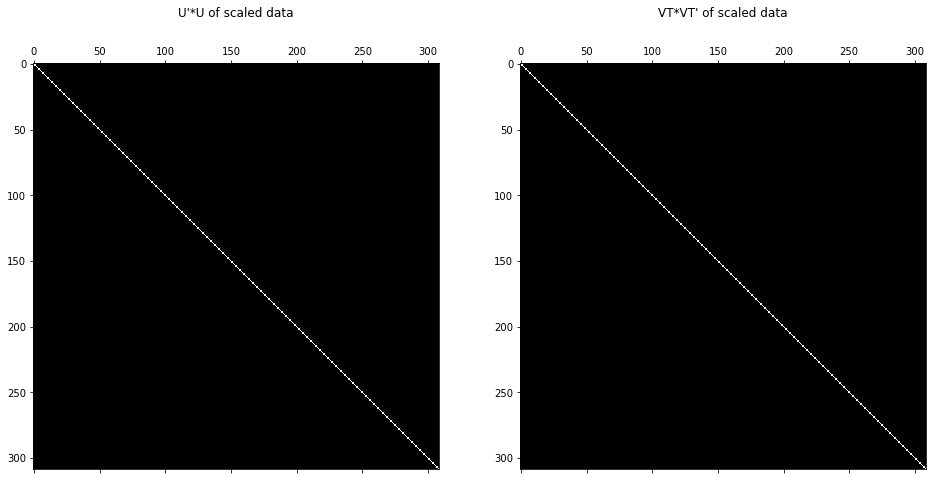

In [5]:
# testing the orthonormality of U and V - the matrix mulitplication of U and its transpose as well as VT and its transpose, V, 
# should result in identity matrices

# perform matrix multiplication of U and VT
UorthTest = np.matmul(np.transpose(Usd),Usd)
VTorthTest = np.matmul(VTsd,np.transpose(VTsd))

# check values in diagonal to determine if all are ones
UtestDiag = np.diagonal(UorthTest)
VTtestDiag = np.diag(VTorthTest)
# this is evidenced if the sum of the diagonal = the sum of the matrix = length of diagonal
UtestDiagSum = np.sum(UtestDiag)
UorthTestSum = np.sum(UorthTest)
UdiagLength = np.shape(UtestDiag)[0]

VtestDiagSum = np.sum(VTtestDiag)
VorthTestSum = np.sum(VTorthTest)
VdiagLength = np.shape(VTtestDiag)[0]

print("The sum of U'*U, its diagonal, and its diagonals length are equivalent - within MP - :",UorthTestSum,UtestDiagSum,UdiagLength,
     "| as are those of VT*VT':",VorthTestSum,VtestDiagSum,VdiagLength)

# Visualizing these test to help evidence that they are identity matrices
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.matshow(UorthTest,cmap = 'gray');
ax2.matshow(VTorthTest,cmap = 'gray');
ax1.set_title("U'*U of scaled data",y=1.1);
ax2.set_title("VT*VT' of scaled data",y=1.1);
fig.set_size_inches(16,16)


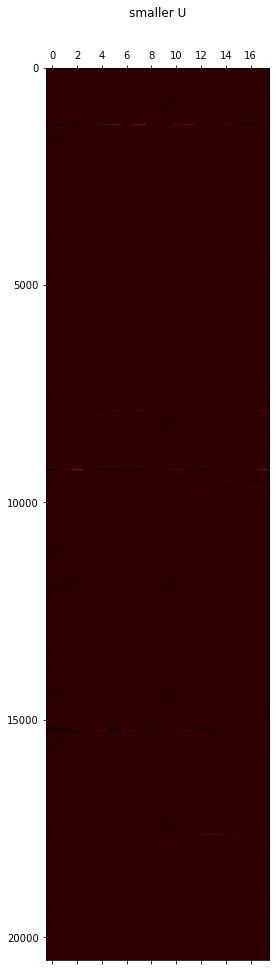

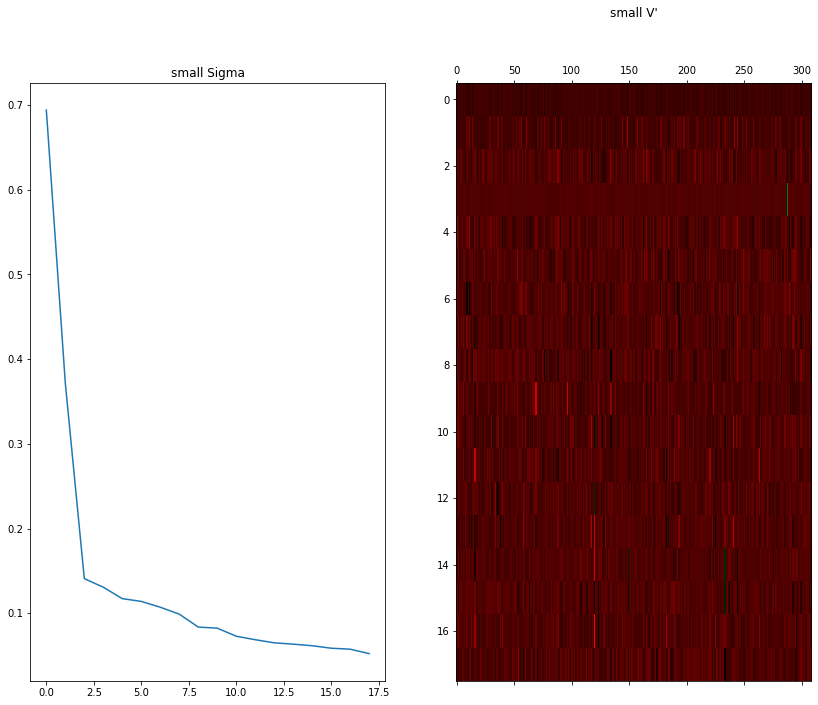

In [6]:
# pulling the columns and rows corresponding to sigma values above 0.05 for closer inspection - this cutoff is arbitrarily 
# determined from the plot of sigma values 2 cells above

# define the number of sigma values oabove this cutoff
numS = np.count_nonzero(Ssd > 0.05)

# python starts indexing at 0 - pulls U columns and VT rows out of original matrices
UsdSmall = Usd[:,0:numS]
VTsdSmall = VTsd[0:numS,:]
SsdSmall = Ssd[0:numS]
# Visualize these patterns in rasterized form 
plt.matshow(UsdSmall,cmap = cmap1, aspect = 'auto')
plt.title("smaller U")
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(SsdSmall)
ax1.title.set_text("small Sigma")
ax2.matshow(VTsdSmall,cmap = cmap1, aspect = 'auto')
ax2.set_title("small V'",y=1.1)
fig.set_size_inches(14,11)


U is still so large that there is nothing discernible in its rasterized form. This closer view of sigma reveals that the change between sigma values slows quickly and is very significant by around the 11th pattern.

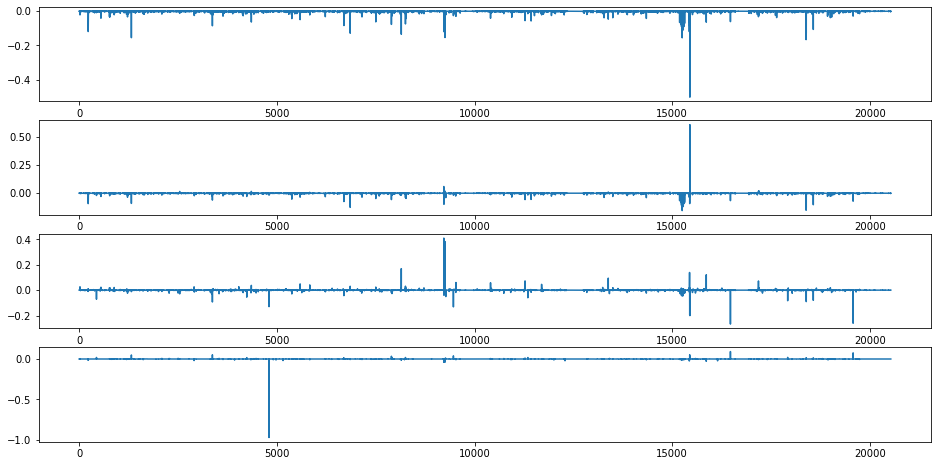

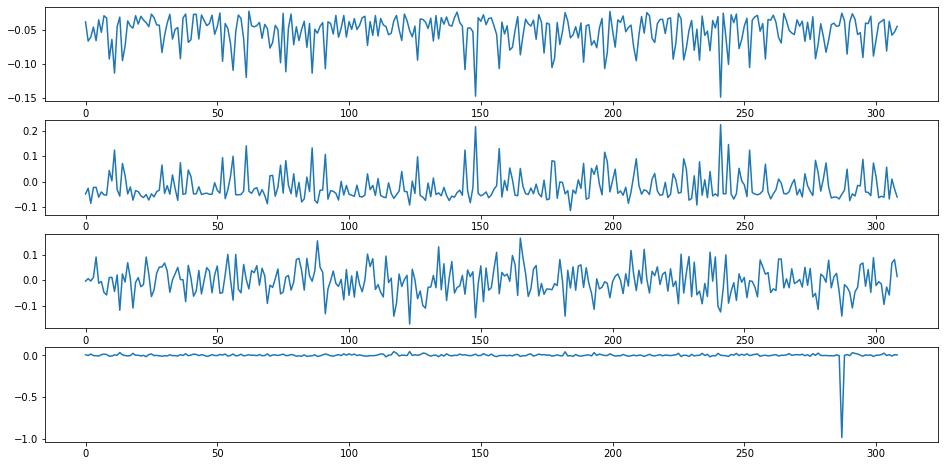

In [7]:
# Visualize the first 4 patterns as plots for U and V
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4)
ax1.plot(UsdSmall[:,0])
ax2.plot(UsdSmall[:,1])
ax3.plot(UsdSmall[:,2])
ax4.plot(UsdSmall[:,3])
fig.set_size_inches(16,8)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4)
ax1.plot(VTsdSmall[0,:])
ax2.plot(VTsdSmall[1,:])
ax3.plot(VTsdSmall[2,:])
ax4.plot(VTsdSmall[3,:])
fig.set_size_inches(16,8)

These plots don't show any distinct patterns or hint towards patterns - though this makes sense as the data is not in any way sorted. The 4th pattern in VT shows an anomalous patient that deviates significantly from the average value of that row - seen as a large downward spike - this will need to be investigated at some point.


The next section of code will focus on performing the SVD on sorted scaled data and analyzing it - for efficiency it will be assumed that the proofs of the SVD above will carry over for subsequent computations of the SVD.

The max difference between the sigma from unsorted and sorted data is: 6.661338147750939e-16


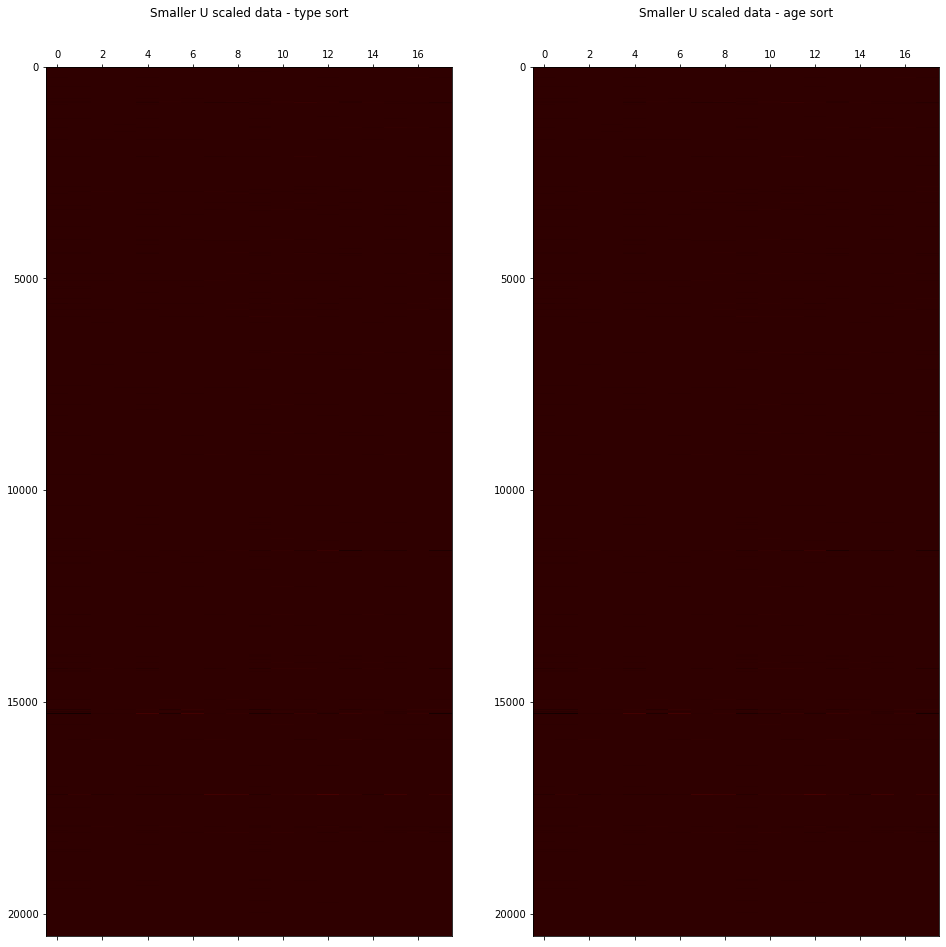

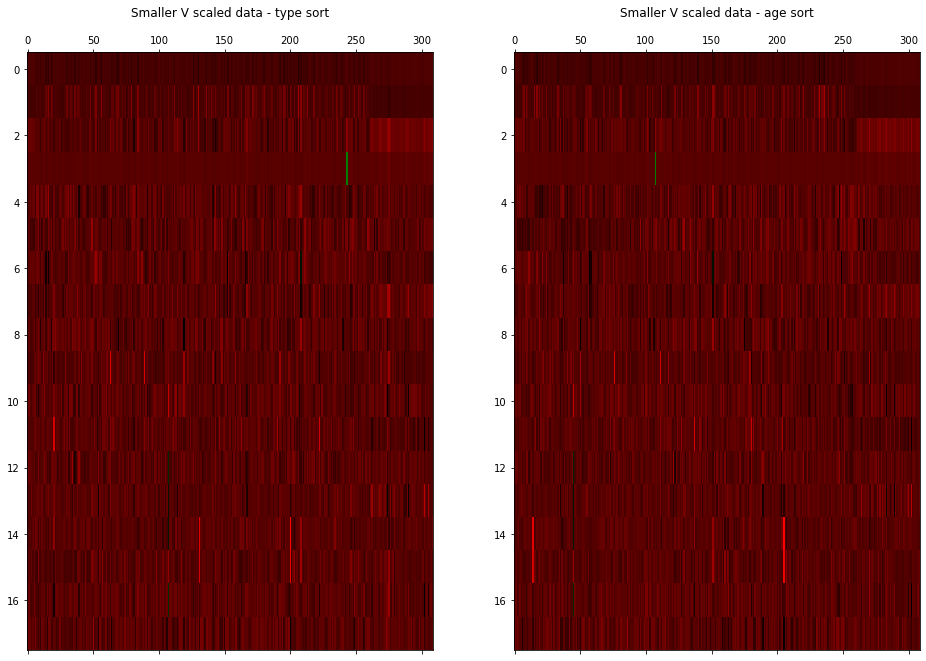

In [8]:
# Computation of the SVD on the scaled data sorted by either classification of the cancer:
     # scaledTypeLabels = [6xadenosquamous; 255xcervical squamous cell cancer;28xEndocervical Type of Adenocarcinoma;
     #                     3xEndometrioid Adenocarcinoma of Endocervix;17xMucinous Adenocarcinoma of Endocervical Type]
# or by age - no definite cutoff has been defined

# Computing the SVD
UsType, SsType, VsType = np.linalg.svd(scaledDataType,full_matrices = False)
UsAge, SsAge, VsAge = np.linalg.svd(scaledDataAge,full_matrices = False)

# Shrinking the output to fit the sigma values above 0.05 as done in the section above - this is 18 columns/rows - sigmas 
# produced with differently sorted data are the same within machine precision
print("The max difference between the sigma from unsorted and sorted data is:",max(SsType - Ssd))

UsTypeSmall = UsType[:,0:numS]
VsTypeSmall = VsType[0:numS,:]
UsAgeSmall = UsAge[:,0:numS]
VsAgeSmall = VsAge[0:numS,:]

# Visualize the rasterized forms of these matrices
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.matshow(UsTypeSmall,cmap = cmap1,aspect = 'auto')
ax2.matshow(UsAgeSmall,cmap = cmap1,aspect = 'auto')
ax1.set_title("Smaller U scaled data - type sort")
ax2.set_title("Smaller U scaled data - age sort")
fig.set_size_inches(16,16)

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.matshow(VsTypeSmall,cmap = cmap1,aspect = 'auto')
ax2.matshow(VsAgeSmall,cmap = cmap1,aspect = 'auto')
ax1.set_title("Smaller V scaled data - type sort")
ax2.set_title("Smaller V scaled data - age sort")
fig.set_size_inches(16,11)

After sorting, looking at rows 2-3 in V' there appears to be some sort of pattern with the middle region potentially being a different expression level - this will require closer analysis to confirm.

Closer analysis will begin with the scaled data sorted by type.

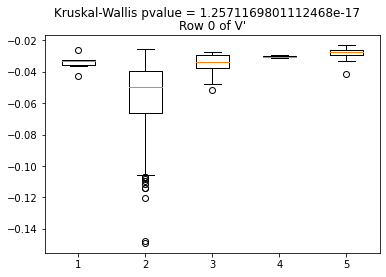

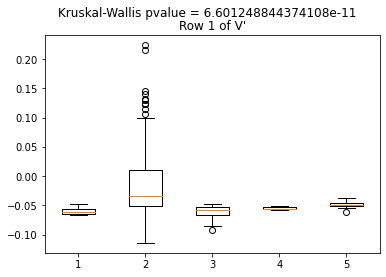

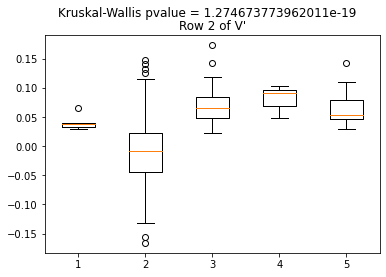

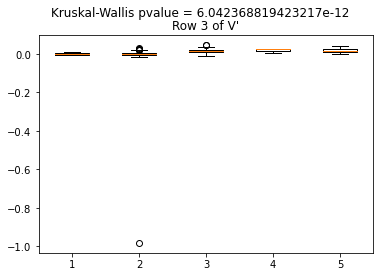

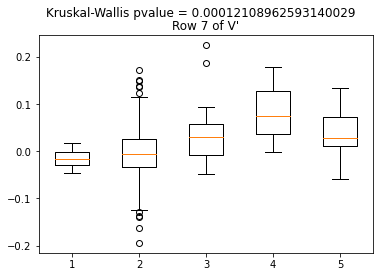

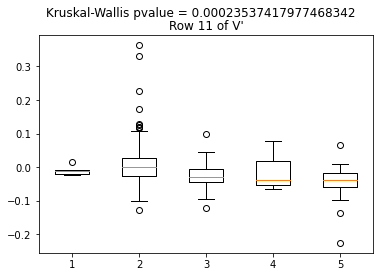

In [9]:
# computing Kruskal-Wallis p-values across all types for each row in the smaller V'
# for reference these are the type labels and amounts -
    # scaledTypeLabels = [6xadenosquamous; 255xcervical squamous cell cancer;28xEndocervical Type of Adenocarcinoma;
    #                     3xEndometrioid Adenocarcinoma of Endocervix;17xMucinous Adenocarcinoma of Endocervical Type]
# refered to as type 0 - type 4 for shorter variable names henceforth

# Define the number of patients within each classification
typeLabelsSpacing = [6,255,28,3,17]

# for loop to calculate the pvalues of the rows present in smaller VT - index of those pvalues below a threshold (0.001)
# will be saved
kruskp = [None]*np.shape(VsTypeSmall)[0]
count = 0
indP = [0]*np.shape(VsTypeSmall)[0]
for x in range(0,np.shape(VsTypeSmall)[0]):
#   defining the different classifications and which columns fit within them
    type0 = VsTypeSmall[x,0:typeLabelsSpacing[0]]
    type1 = VsTypeSmall[x,typeLabelsSpacing[0]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]]
    type2 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]]
    type3 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]]
    type4 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]+typeLabelsSpacing[4]]
    h, kruskp[x] = stat.kruskal(type0,type1,type2,type3,type4)
#   if statement that only saves indices if pvalue is below chosen threshold
    if kruskp[x] < 0.001:
        indP[count] = x+1
        count = count+1
#   removing uneeded elements in indP
    numP = np.count_nonzero(indP)
    indBox = indP[0:numP];
#   convert the indices back down to real value - was increased to allow use of count nonzero
    indBox = [x - 1 for x in indBox];
    
# for loop to look at the rows of VT with a p-value below w/boxplots
for x in indBox:
    type0 = VsTypeSmall[x,0:typeLabelsSpacing[0]]
    type1 = VsTypeSmall[x,typeLabelsSpacing[0]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]]
    type2 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]]
    type3 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]]
    type4 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]+typeLabelsSpacing[4]]
    fig, ax1 = plt.subplots(1)
    ax1.boxplot([type0,type1,type2,type3,type4])
    fig.suptitle(f"Kruskal-Wallis pvalue = {kruskp[x]}")
    ax1.set_title(f"Row {x} of V'")

Looking at these boxplots it seems that for many of the signficant patterns, cervical squamous cell cancer - type1 or the 2nd x-label of the boxplots - trends alternatively to the other types (Rows 0,1,2 and 7). Due to this, these patterns will be investigated in the following section by grouping them into squamous cell and non-squamous cell patients. 

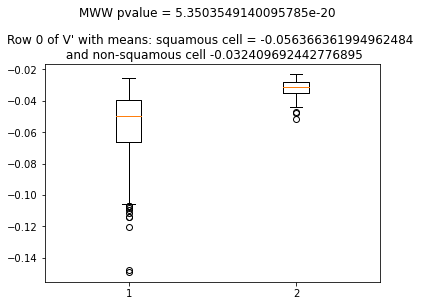

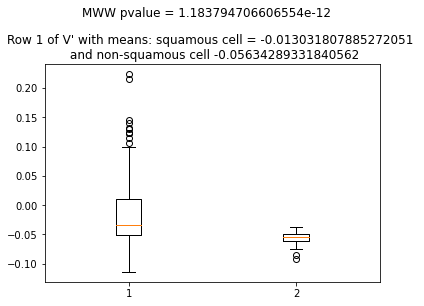

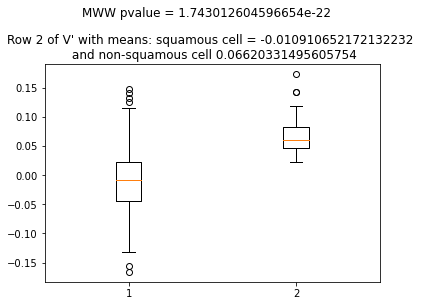

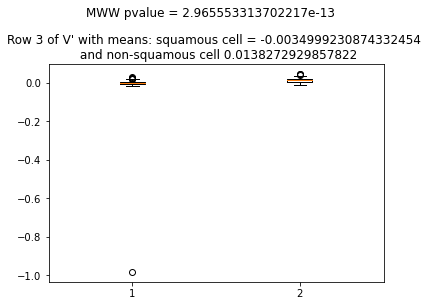

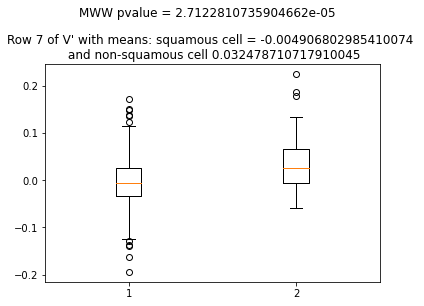

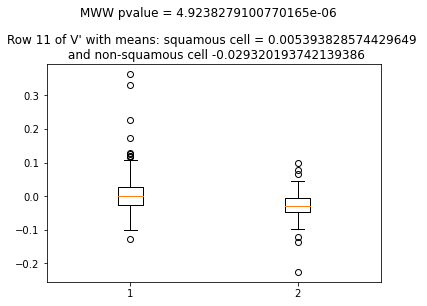

In [10]:
# investigating with two type grouping - will use Mann Whitney Wilcoxon and boxplots
for x in indBox:
    type0 = VsTypeSmall[x,0:typeLabelsSpacing[0]]
    type1 = VsTypeSmall[x,typeLabelsSpacing[0]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]]
    type2 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]]
    type3 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]]
    type4 = VsTypeSmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]+typeLabelsSpacing[4]]
#   concatenate the non squamous cell types
    notType1 = np.concatenate((type0,type2,type3,type4))
#   find the mean of the groups to know how expression is affected (over vs under)
    meanT1 = np.mean(type1)
    meanNT1 = np.mean(notType1)
    u,MWWpvalue = stat.mannwhitneyu(type1,notType1)
    fig, ax1 = plt.subplots(1)
    ax1.boxplot([type1,notType1])
    fig.suptitle(f"MWW pvalue = {MWWpvalue}", y=1.08)
    ax1.set_title(f"Row {x} of V' with means: squamous cell = {meanT1} \n and non-squamous cell {meanNT1}")
    

As the pattern in row 2 was the most significant for row 2, at 1.7x10-22, it was chosen for further analysis in the section below w/the hypergeometric pvalue and GOrilla.

In [11]:
#appending the geneNames to U and sorting them by column 2 as it pairs with the significant pattern noted above
geneNames = geneName = pd.read_csv("C:/Users\Jordan\Documents\GitHub\PythonCode\Data Science for Engineers\BME6900 Cont\geneNamesDefault.csv")
UsTypeGenes = np.concatenate((geneName,UsTypeSmall),1);
# create a copy of the geneNames + U matrix so that sorting will not affect the original matrix
UsTypeGenesSort = UsTypeGenes.copy()
# sort in both ascending and descending order by the 3rd index which is the 2nd column due to placement of gene names
UsTypeGenesSortAsc = UsTypeGenesSort[UsTypeGenesSort[:,3].argsort()]
UsTypeGenesSortDesc = UsTypeGenesSort[UsTypeGenesSort[:,3].argsort()[::-1]]

# print the genes so they can be copy and pasted into GOrilla - descending in this cell and ascending in the next
numGene = np.shape(geneNames)
sortGenesAsc = UsTypeGenesSortAsc[:,0]
sortGenesDesc = UsTypeGenesSortDesc[:,0]

# for x in range(0,geneNames.shape[0]):
#     print(sortGenesAsc[x])
# commented out for print/export purposes as 20k lines is too many

In [12]:
# printing the descending order
# for x in range(0,geneNames.shape[0]):
#     print(sortGenesDesc[x])
# commented out for print/export purposes as 20k lines is too many

Using these lists as inputs to GOrilla (with a pvalue cutoff of 10^-8) gave the following results for ascending order:

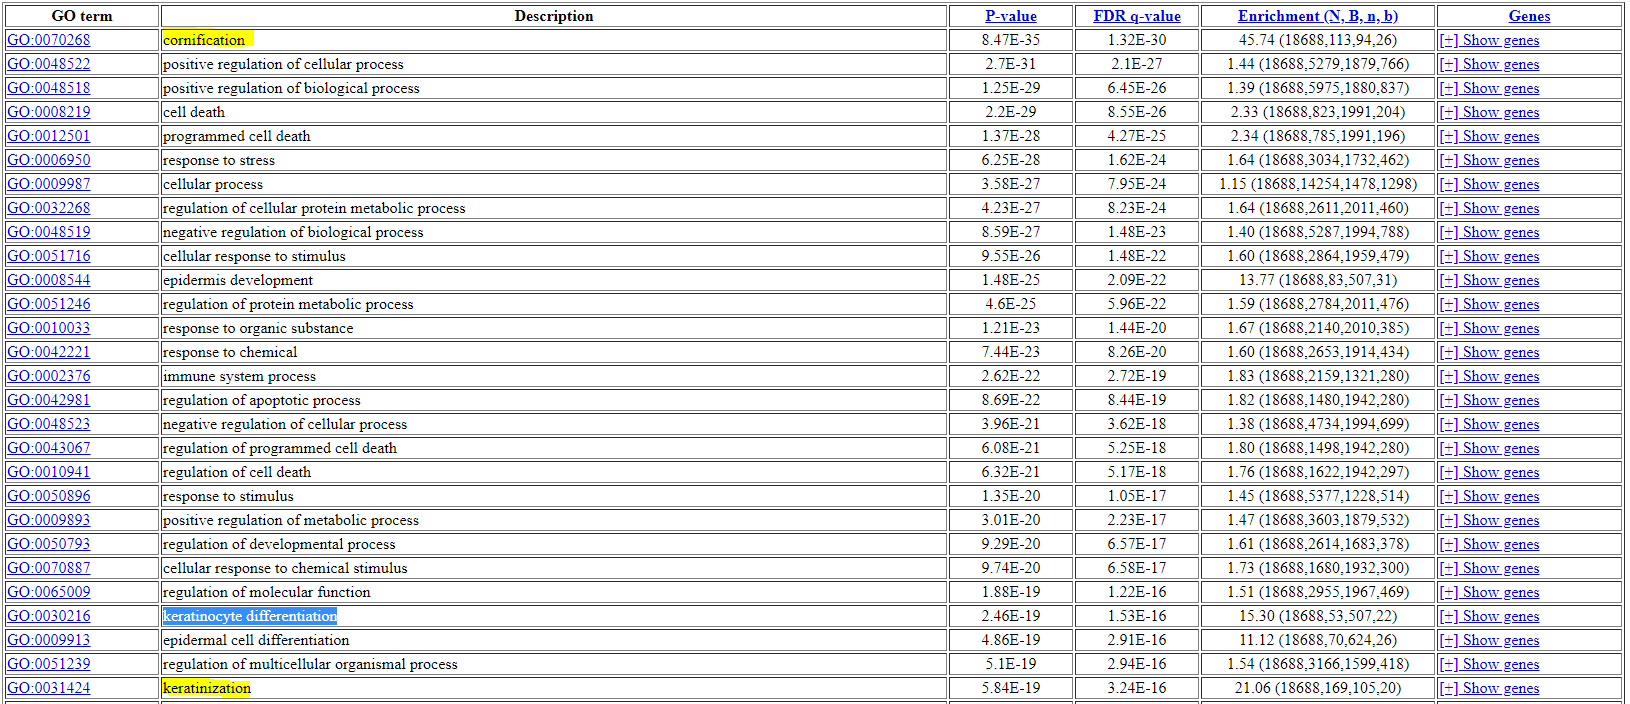

The highlighted lines in the table indicate processes that are common to squamous cell lung cancer as well - they are part of what distinguishes the cancer as squamous cell as do those circled below. In this case they are overexpressed as the average value for squamous cell cancer is -0.11 while it is 0.066 for the other types.

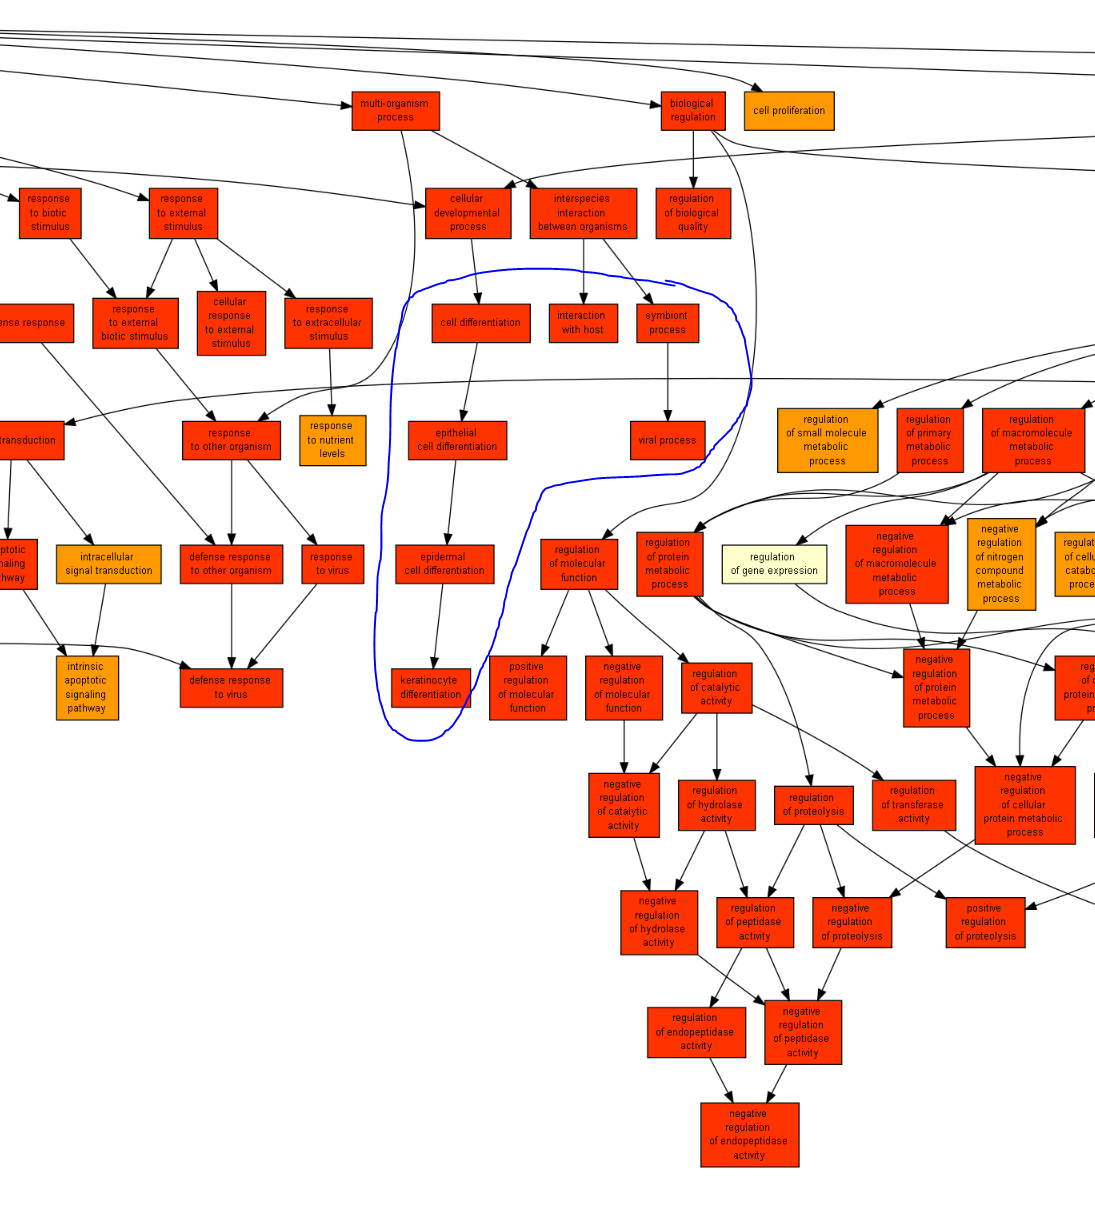

For descending order the following results were obtained:

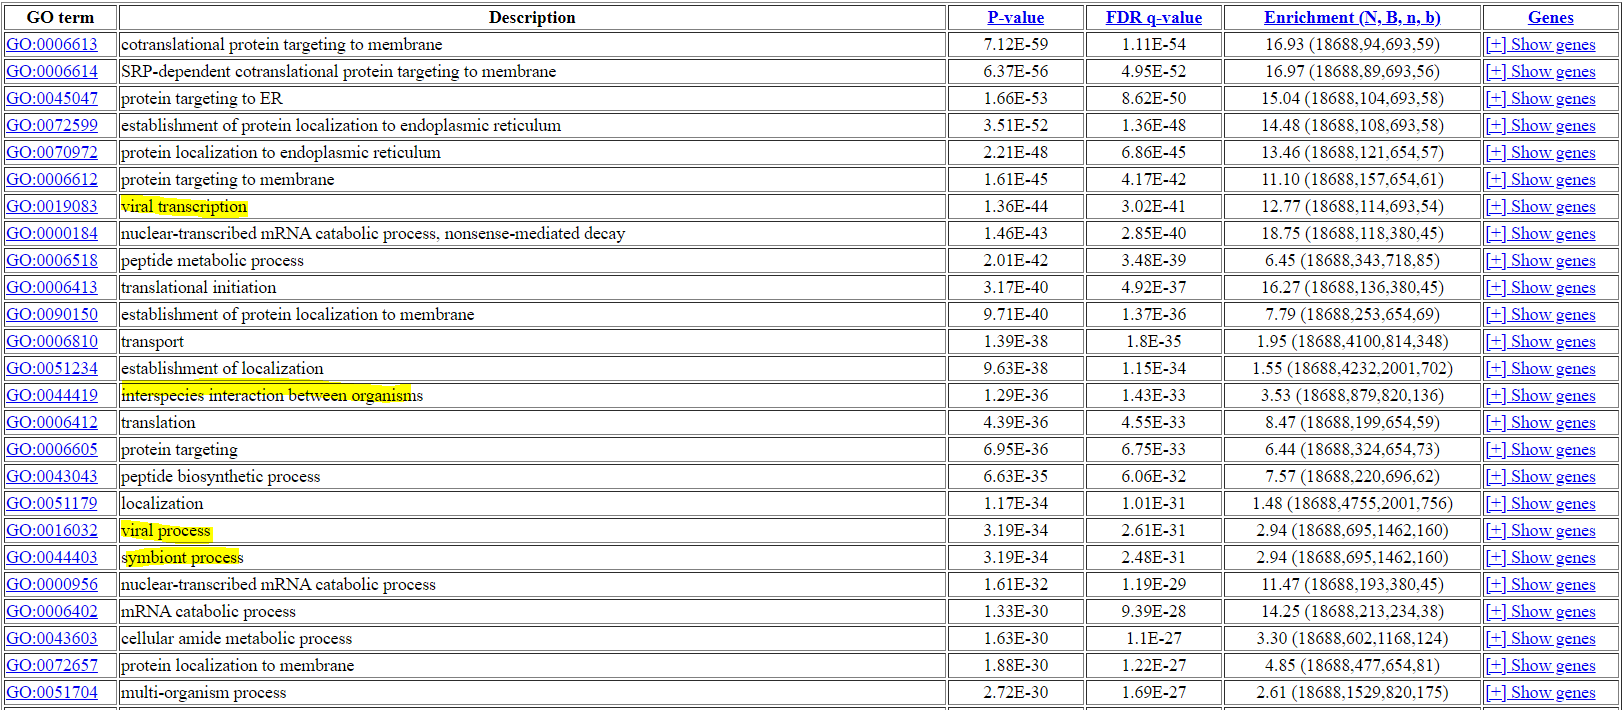

The highlighted lines in this case were of note to me as they are processes I found were expressed differntly between men and women with squamous cell lung cancer. This is interesting and something I may look into more for my project.

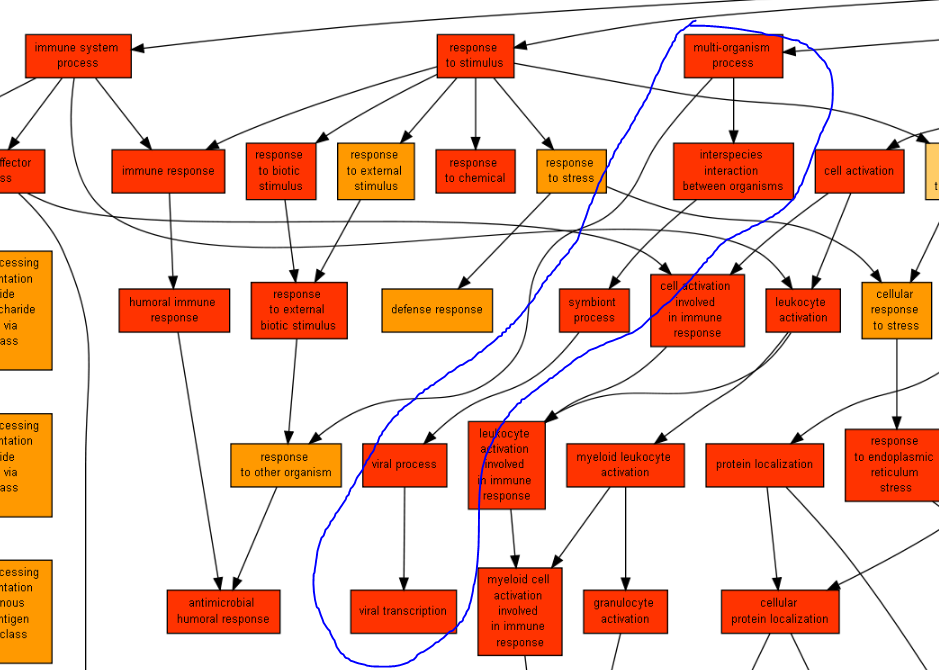
    

In [13]:
# zero mean center the data across its rows and columns as a preprocessing step to make it symmetric - I will perform 
# the same statistical analysis for the same rows and columns as was done above to see how the preprocessing affects the results

# the sklearn.preprocessing.scale() function performs both zero-mean centering adn unit variance scaling for the entire array
# so this will be used for efficiencies sake - I think that the unit variance scaling may have a fairly large impact on the 
# values computed by the SVD

from sklearn import preprocessing as pre

scaledDataTypeZeroUnit = pre.scale(scaledDataType)

# confirm that means are now zero and the variance is 1

meanScaled = scaledDataTypeZeroUnit.mean(axis = 0)
maxMS = max(meanScaled)
minMS = min(meanScaled)
print("The maximum mean of the preprocessed data is:",maxMS,"the minimum is",minMS)

varScaled = scaledDataTypeZeroUnit.std(axis = 0)
maxVar = max(varScaled)
minVar = min(varScaled)
print("The max and min variance of the preprocessed data are: ",maxVar,",",minVar)


The maximum mean of the preprocessed data is: 3.4609972516322465e-17 the minimum is -4.014756811893406e-17
The max and min variance of the preprocessed data are:  1.0000000000000002 , 0.9999999999999997


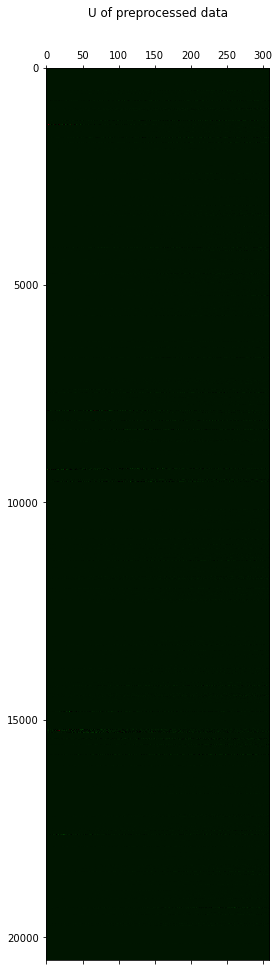

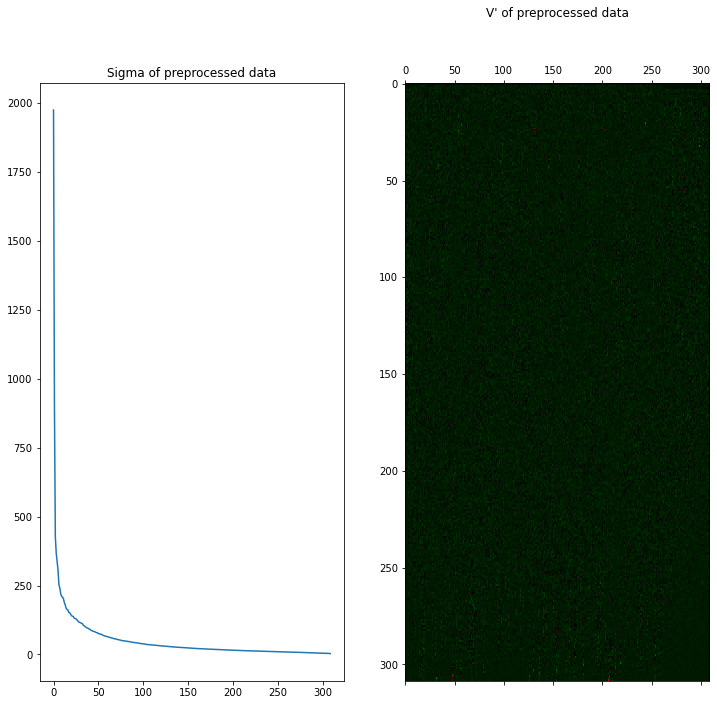

In [14]:
#compute the SVD, visualize and MWW pvalue/boxplots

UsTypeZU, SsTypeZU, VTsTypeZU = np.linalg.svd(scaledDataTypeZeroUnit,full_matrices = False)

# visualize the output of the SVD
plt.matshow(UsTypeZU,cmap = cmap1, aspect = 'auto')
plt.title("U of preprocessed data")
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(SsTypeZU)
ax1.title.set_text("Sigma of preprocessed data")
ax2.matshow(VTsTypeZU,cmap = cmap1, aspect = 'auto')
ax2.set_title("V' of preprocessed data",y=1.1)
fig.set_size_inches(12,11)




Earlier we reduced the outputs to the patterns corresponding to sigma values >0.05 - the scaling greatly changed the magnitude of sigma so for this comparison we will reduce the outputs to just the first 18 rows/columns as this matches above. The output after preprocessing the data resulted in a much more green U and VT - this is due to the shift towards zero-center where it must have been positively centered before.

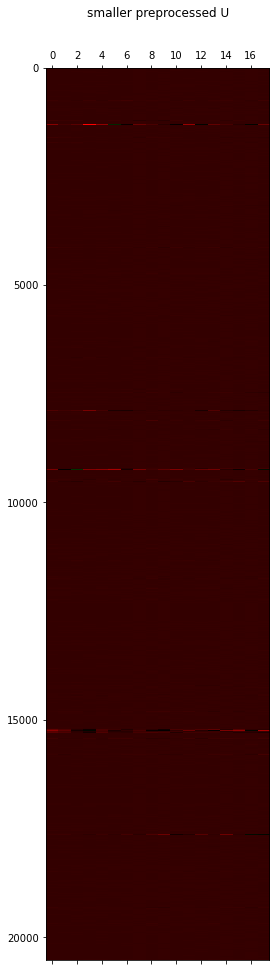

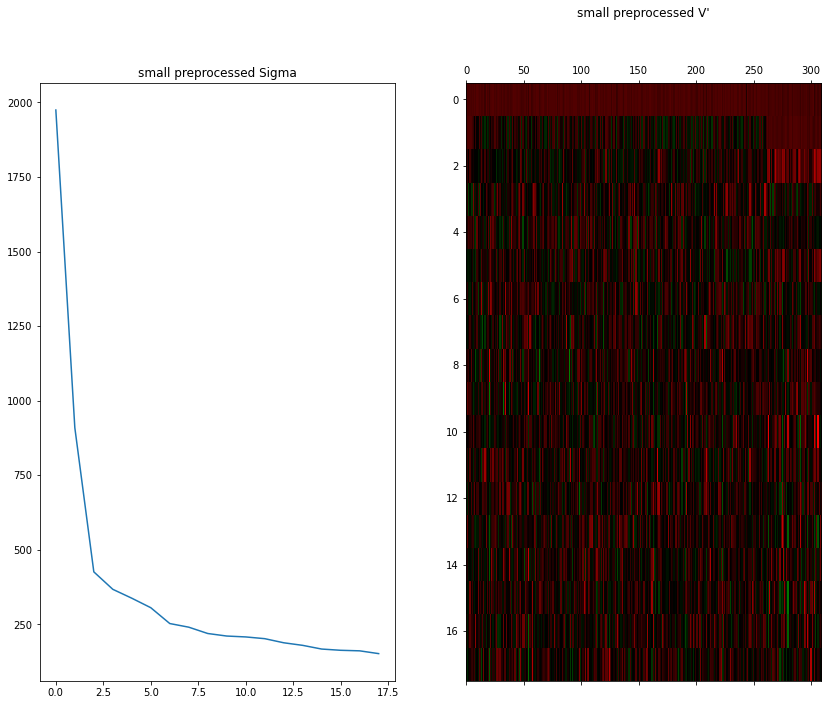

In [15]:
# taking a closer look at the outputs - reducing to 18 patterns
UsTZUsmall = UsTypeZU[:,0:18]
VsTZUsmall = VTsTypeZU[0:18,:]
SsTZUsmall = SsTypeZU[0:18]

# visualizing the closer look
plt.matshow(UsTZUsmall,cmap = cmap1, aspect = 'auto')
plt.title("smaller preprocessed U")
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(SsTZUsmall)
ax1.title.set_text("small preprocessed Sigma")
ax2.matshow(VsTZUsmall,cmap = cmap1, aspect = 'auto')
ax2.set_title("small preprocessed V'",y=1.1)
fig.set_size_inches(14,11)

Looking at this closer inspection it seems that the Zero centered mean and unit variance is useful for visualization purposes. The increased contrast in V' allows us to see that the last 40-50 patients in row 1 have a noticeable pattern of increased expression.

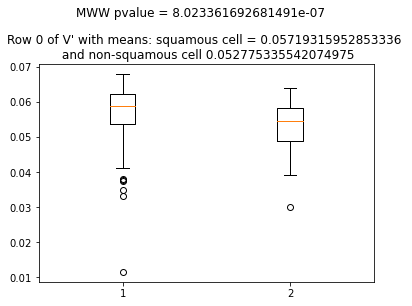

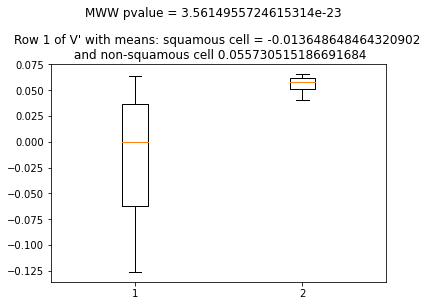

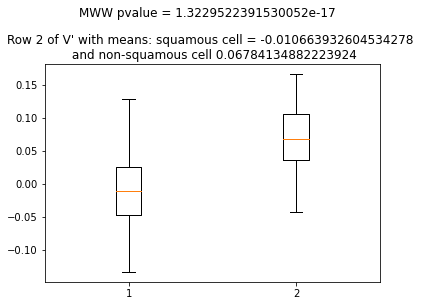

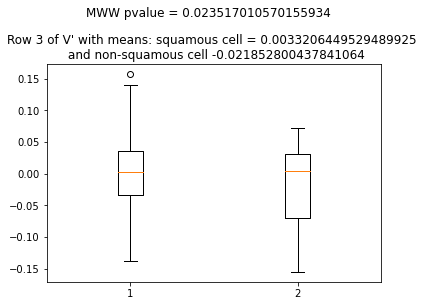

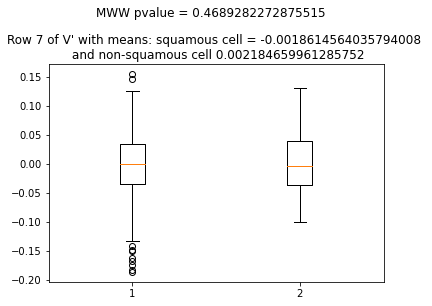

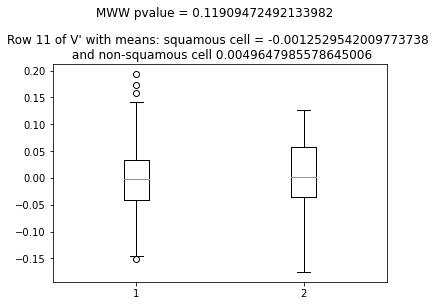

In [16]:
# investigating the same patterns as above using MWW and boxplots
for x in indBox:
    type0 = VsTZUsmall[x,0:typeLabelsSpacing[0]]
    type1 = VsTZUsmall[x,typeLabelsSpacing[0]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]]
    type2 = VsTZUsmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]]
    type3 = VsTZUsmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]]
    type4 = VsTZUsmall[x,typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]:
                       typeLabelsSpacing[0]+typeLabelsSpacing[1]+typeLabelsSpacing[2]+typeLabelsSpacing[3]+typeLabelsSpacing[4]]
#   concatenate the non squamous cell types
    notType1 = np.concatenate((type0,type2,type3,type4))
#   find the mean of the groups to know how expression is affected (over vs under)
    meanT1 = np.mean(type1)
    meanNT1 = np.mean(notType1)
    u,MWWpvalue = stat.mannwhitneyu(type1,notType1)
    fig, ax1 = plt.subplots(1)
    ax1.boxplot([type1,notType1])
    fig.suptitle(f"MWW pvalue = {MWWpvalue}", y=1.08)
    ax1.set_title(f"Row {x} of V' with means: squamous cell = {meanT1} \n and non-squamous cell {meanNT1}")

In contrast to the analysis done without preprocessing of the data, Row 1 rather than Row 2, has the most significant MWW pvalue at 3.6x10-23 - smaller than any of the pvalues found before preprocessing. Additionally, many of the pvalues changed significantly with 3 of the 6 patterns found to have a pvalue below 0.001 before, are no longer below this threshold and 2 are not even significant at an alpha of 0.05. 

In [17]:
# comparing the 2nd columns of each U matrix, prior to preproccessing and post processing, to see the affect on which genes are
# over/under expressed - this will be done by comparing the sorted list of gene names and counting differences

UsTypeGenesZU = np.concatenate((geneName,UsTZUsmall),1);
# create a copy of the geneNames + U matrix so that sorting will not affect the original matrix
UsTypeGenesSortZU = UsTypeGenesZU.copy()
# sort in both ascending and descending order by the 3rd index which is the 2nd column due to placement of gene names
UsTypeGenesSortAscZU = UsTypeGenesSortZU[UsTypeGenesSortZU[:,3].argsort()]
UsTypeGenesSortDescZU = UsTypeGenesSortZU[UsTypeGenesSortZU[:,3].argsort()[::-1]]

# print the genes so they can be copy and pasted into GOrilla - descending in this cell and ascending in the next
sortGenesAscZU = UsTypeGenesSortAscZU[:,0]
sortGenesDescZU = UsTypeGenesSortDescZU[:,0]
    
#this is the loop that counts the number of matching genes for sort order
diffGene = [None]*geneName.shape[0]

for x in range(0,geneName.shape[0]):
    if sortGenesAsc[x] == sortGenesAscZU[x]:
        diffGene[x] = 0
    else :
        diffGene[x] = 1
        
numDiff = np.sum(diffGene)
print("The number of genes in a different position after sorting is:",numDiff)
print("")

# # print the sorted gene names for input into GOrilla
# for x in range(0,geneNames.shape[0]):
#     print(sortGenesAscZU[x])
    # commented out for print/export purposes as 20k lines is too many

The number of genes in a different position after sorting is: 20498



While the total number of genes in a different position is 20498 - basically all genes are in a different position - even a quick glance at the printed gene names shows that there are still similarities in the pattern - KRT genes still make up the first 4 in the list. Inputing these names into GOrilla further agrees with this because while the processes are in a different order they are mostly close to their original position which indicates to me that the results for this pattern are basically the same with and without preprocessing.

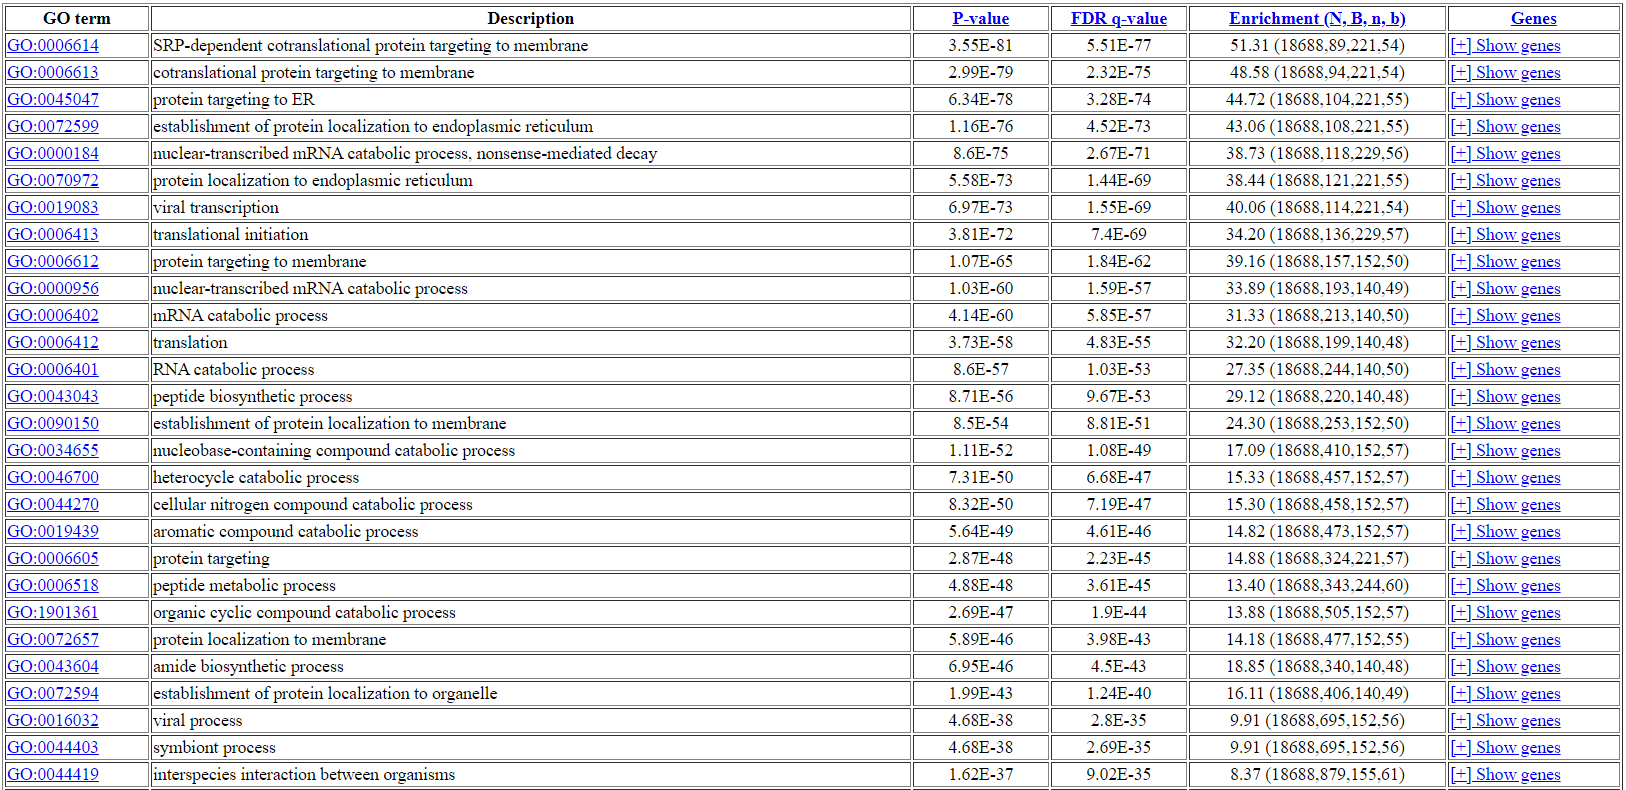

In [18]:
# Sorting columns 1 and checking it in GOrilla as it is the most significant row in VT after preprocessing to zero mean unit var

UsTypeGenesZUc1 = np.concatenate((geneName,UsTZUsmall),1);
# create a copy of the geneNames + U matrix so that sorting will not affect the original matrix
UsTypeGenesSortZUc1 = UsTypeGenesZUc1.copy()
# sort in both ascending and descending order by the 3rd index which is the 2nd column due to placement of gene names
UsTypeGenesSortAscZUc1 = UsTypeGenesSortZUc1[UsTypeGenesSortZUc1[:,2].argsort()]
UsTypeGenesSortDescZUc1 = UsTypeGenesSortZUc1[UsTypeGenesSortZUc1[:,2].argsort()[::-1]]

# print the genes so they can be copy and pasted into GOrilla - descending in this cell and ascending in the next
sortGenesAscZUc1 = UsTypeGenesSortAscZUc1[:,0]
sortGenesDescZUc1 = UsTypeGenesSortDescZUc1[:,0]

# print the ascending sorted gene names for input into GOrilla
# for x in range(0,geneNames.shape[0]):
#     print(sortGenesAscZUc1[x])
# commented out for print/export purposes as 20k lines is too many

In [19]:
# print the descending sorted gene names for input into GOrilla
# for x in range(0,geneNames.shape[0]):
#     print(sortGenesDescZUc1[x])
# commented out for print/export purposes as 20k lines is too many

While the ascending sorted list of gene names for Col 1 has some similarities to the ascending sorted list for Col 2:

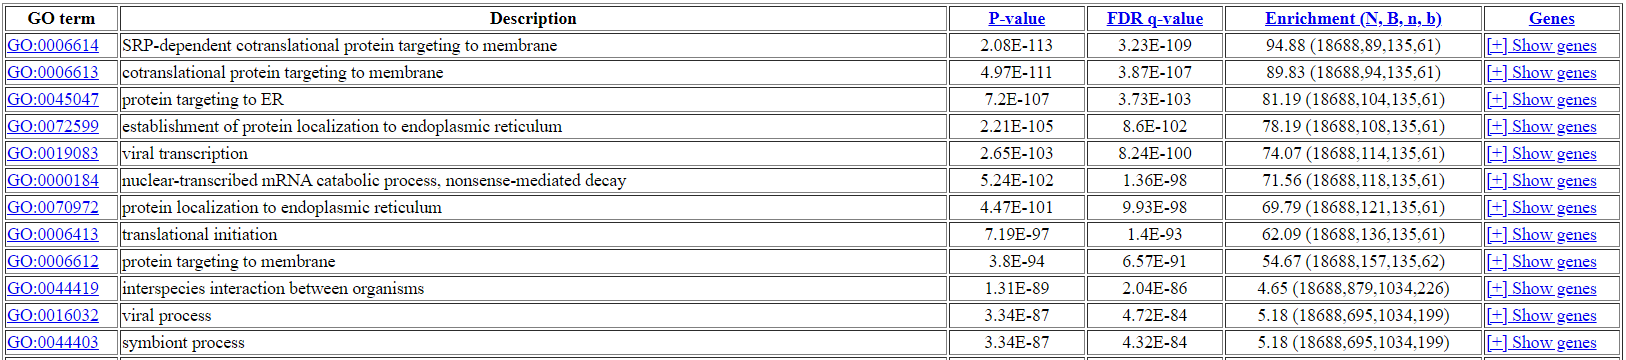

The results for the descending sorted list for Col 1 has more specific processes with the highest pvalues - the top set of which are all signaling/chemotaxis based.

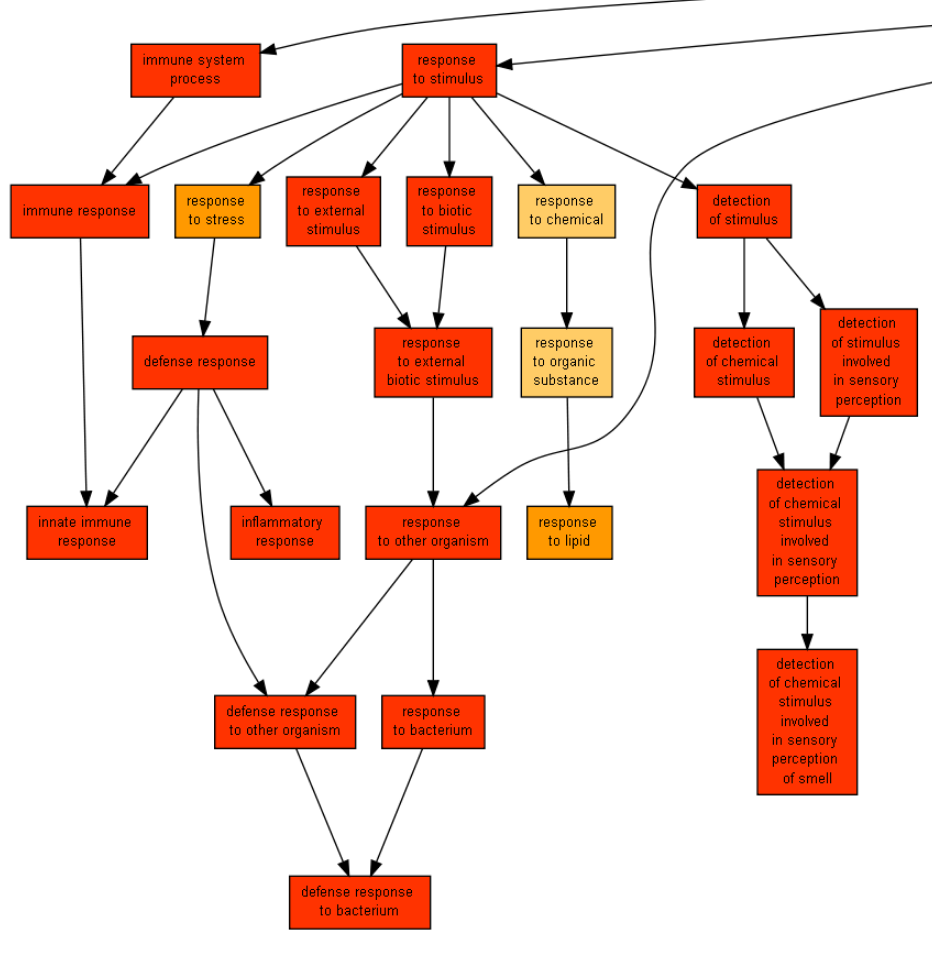

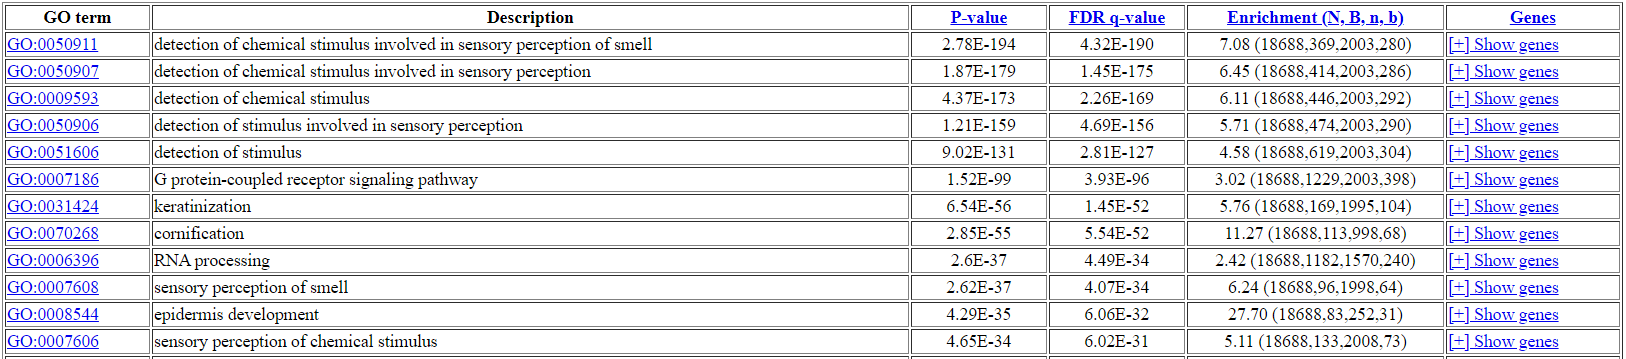

This demonstrates that while preprocessing methods may not have a significant impact on individual patterns, they can bring attention to different patterns than would normally be focused on. This pattern may have been ignored as it had several other patterns with smaller pvalues competing for attention originally. However, as preprocessing dropped its MWW pvalue 11 orders of magnitude, E-12 to E-23, it made it look much more promising.


In [20]:
# computing hypergeometric pvalue for Row 1 of the preproccessed data used above based off a cutoff midway between the averages
# of each group in their boxplot and the groupings Not-squamous cell and squamous cell 

cutoff = (-0.0136 + 0.0557)/2

# assigning labels to row1 of VT so it can be sorted and maintain its labels

row1vals = np.transpose(VsTZUsmall[1,:])
t0lab = ["type0"]*typeLabelsSpacing[0]
t1lab = ["type1"]*typeLabelsSpacing[1]
t2lab = ["type2"]*typeLabelsSpacing[2]
t3lab = ["type3"]*typeLabelsSpacing[3]
t4lab = ["type4"]*typeLabelsSpacing[4]
rowlabels = np.transpose(np.concatenate((t0lab,t1lab,t2lab,t3lab,t4lab)))

# create arrays for sorting
numPat = np.shape(rowlabels)[0]
row1labeled = np.empty([numPat,2],dtype = object)
for x in range(0,numPat):
    row1labeled[x] = [rowlabels[x],row1vals[x]]
row1labeledSort = row1labeled.copy()

# sort the array from low to high
R1labSortLH = row1labeledSort[row1labeledSort[:,1].argsort()]

# define variables for use in hypergeometric pvalue 
K = typeLabelsSpacing[1]; # total number of patients in the group of interest
N = numPat; # total number of patients
type1select = [0]*numPat
totalselect = [0]*numPat

# search through sorted row to determine how many of squamous cell were below threshold
for x in range(0,numPat):
    if R1labSortLH[x,1] < cutoff:
        totalselect[x] = 1;
        if R1labSortLH[x,0] == 'type1':
            type1select[x] = 1

k = np.count_nonzero(type1select) # number of group selected
n = np.count_nonzero(totalselect) # total number selected

# calculating hypergeometric pvalue - spec.comb is the n choose k function
from scipy import special as spec
hypGpval = (spec.comb(K,k,exact=True)*spec.comb((N-K),(n-k),exact=True))/spec.comb(N,n,exact=True)

print("The hyper geometric pvalue for selecting",k, "from squamous cell cancer of",n,"total selected and",K,
     "total of that type is - based off a cutoff of",cutoff,"- is",hypGpval)
    

The hyper geometric pvalue for selecting 165 from squamous cell cancer of 165 total selected and 255 total of that type is - based off a cutoff of 0.02105 - is 1.791322288231161e-21
